## CDF curves for 4 US models (1A, 2A, 1B, 2B) and wflow_sbm 
### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pickle

### Load wflow_sbm NSE values

In [9]:
data = pd.read_csv('data/US_wflow/wflow_sbm_CAMELS_results_overview.csv', sep=";")

### Function to calculate CDF

In [5]:
def ecdf(x: np.ndarray):
    """Calculates empirical cumulative density function. """
    xs = np.sort(x)
    ys = np.arange(1, len(xs) + 1) / float(len(xs))
    return xs, ys

## CDF results US

In [6]:
# settings etc.
run_dir = 'data/results/'
wflow_dir = 'data/US_wflow/'

time_scale = ['daily', 'hourly']
experiment_names = ['03_era5_hydromt', '00_nldas2_camels', '01_nldas2_hydromt', '02_era5_camels', 'wflow_US_results']
l = ['Nldas2_Camels', 'Nldas2_HydroMT', 'Era5_Camels', 'Era5_HydroMT', 'wflow_sbm']
experiment_names.sort()
colors = ['lightskyblue', 'darkblue', 'limegreen', 'green', 'orange']

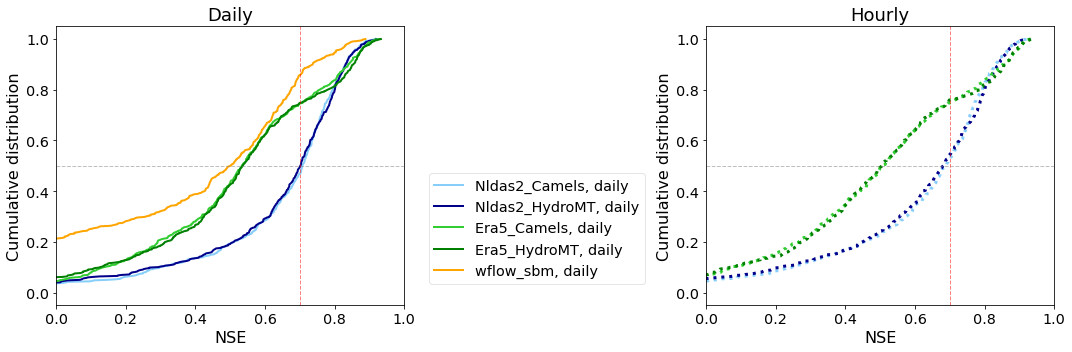

In [17]:
# CDF plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for j, name in enumerate(experiment_names):

    if name.startswith('wflow'):
        with open(wflow_dir +'/metrics_df_daily.pkl', "rb") as fp:
            metrics_df_daily = pickle.load(fp)
    else:
        with open(run_dir + name + '/metrics_df_daily.pkl', "rb") as fp:
            metrics_df_daily = pickle.load(fp)
        with open(run_dir + name + '/metrics_df_hourly.pkl', "rb") as fp:
            metrics_df_hourly = pickle.load(fp)


    for i, metrics_df in enumerate([metrics_df_daily, metrics_df_hourly]):
        metric = metrics_df.columns[0] # 0: NSE
        vals = metrics_df[metric]
        bins, cdf = ecdf(vals)
        ax[i].plot(bins, cdf, label=f'{l[j]}, {time_scale[i]}', ls='-' if i == 0 else ':', color = colors[j], lw='2' if i==0 else '3')
        ls = '-'
        if name.startswith('wflow'):
            ls = '--'
        if name.startswith('wflow'):
            break

ax[0].set_xlim(0, 1)
ax[0].axhline(0.5, color='grey', ls='--', lw=1, alpha=0.5)
ax[0].axvline(0.7, color='red', ls='--', lw=1, alpha=0.5)
ax[0].set_xlabel(metric,fontsize=16)
ax[0].set_ylabel('Cumulative distribution', fontsize=16)
ax[0].set_title('Daily', fontsize=18)

ax[1].set_xlim(0, 1)
ax[1].axhline(0.5, color='grey', ls='--', lw=1, alpha=0.5)
ax[1].axvline(0.7, color='red', ls='--', lw=1, alpha=0.5)
ax[1].set_xlabel(metric, fontsize=16)
ax[1].set_ylabel('Cumulative distribution', fontsize=16)
ax[1].set_title('Hourly', fontsize=18)



lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend(lines, labels, facecolor='white', framealpha=0.5, bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()
